In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
df = pd.read_excel(r'/Users/julianwere/Documents/Arrests Data/arrests-data-num.xlsx', index_col = False)

In [4]:
path = r'/Users/julianwere/Documents/Arrests Data'

In [22]:
df.head()

,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)","Rate per 1,000 population by ethnicity, gender, and PFA","Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)"
0,97117.0,27760111,3.50,1.000
1,574009.0,26854908,21.37,1.000
2,671126.0,54615019,12.29,1.000
3,966.0,424764,2.27,0.011
4,11721.0,403496,29.05,0.023


In [23]:
df.shape

(17052, 4)

In [24]:
df.rename(columns = {'Number of arrests': 'No of arrests','Population by ethnicity, gender, and PFA (based on 2011 Census)': 'Pop by ethnicity and gender', 'Rate per 1,000 population by ethnicity, gender, and PFA':'Rate per 1,000 of pop by ethnicity' ,'Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)':'Prop of arrests of this ethnicity'}, inplace = True)

In [25]:
df.head()

,No of arrests,Pop by ethnicity and gender,"Rate per 1,000 of pop by ethnicity",Prop of arrests of this ethnicity
0,97117.0,27760111,3.50,1.000
1,574009.0,26854908,21.37,1.000
2,671126.0,54615019,12.29,1.000
3,966.0,424764,2.27,0.011
4,11721.0,403496,29.05,0.023


In [27]:
df.describe()

,No of arrests,Pop by ethnicity and gender,"Rate per 1,000 of pop by ethnicity",Prop of arrests of this ethnicity
count,1.632900e+04,1.705200e+04,16329.000000,16560.000000
mean,3.910804e+03,2.613529e+05,26.266065,0.137844
std,3.523994e+04,2.282885e+06,45.089141,0.306414
min,1.000000e+00,3.200000e+01,0.120000,0.000000
25%,2.000000e+01,1.797000e+03,5.620000,0.004000
50%,8.700000e+01,5.036000e+03,14.560000,0.011000
75%,5.190000e+02,2.368400e+04,29.800000,0.034000
max,1.021356e+06,5.607591e+07,1092.310000,1.000000


# Data Consistency checks

In [6]:
# missing values check

In [ ]:
df = df[df['Pop by ethnicity and gender'] <=] 

In [26]:
df.isnull().sum()

No of arrests                         723
Pop by ethnicity and gender             0
Rate per 1,000 of pop by ethnicity    723
Prop of arrests of this ethnicity     492
dtype: int64

In [42]:
df['No of arrests'].mean()

3910.7694698569085

In [36]:
df['Rate per 1,000 of pop by ethnicity'].mean()

26.266065282626137

In [37]:
df['Prop of arrests of this ethnicity'].mean()

0.1378444444444422

In [38]:
df['No of arrests'].fillna(3910, inplace=True)

In [40]:
df['Rate per 1,000 of pop by ethnicity'].fillna(26, inplace=True)

In [41]:
df['Prop of arrests of this ethnicity'].fillna(0.14, inplace=True)

In [ ]:
df['column with missings'].fillna(mean value, inplace=True)

In [43]:
df.isnull().sum()

No of arrests                         0
Pop by ethnicity and gender           0
Rate per 1,000 of pop by ethnicity    0
Prop of arrests of this ethnicity     0
dtype: int64

In [ ]:
#Extreme Vales check

In [ ]:
#population has extreme values which would lead to bias, so an average has been take to bring this variable to scale.Extreme values check.

In [45]:
df['Pop by ethnicity and gender'].mean()

261352.8970208773

In [46]:
df['Pop by ethnicity and gender'].fillna(261352, inplace=True)

In [47]:
df = df[df['Pop by ethnicity and gender'] <=261352]

In [48]:
dups = df.duplicated()

In [49]:
dups.shape 

(14460,)

# Q3. The Elbow Technique

In [55]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [59]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

[-18283855629311.695,
 -3688832346540.843,
 -1643161758010.828,
 -940051569533.691,
 -578546013133.107,
 -429560641981.0213,
 -298767268230.0416,
 -220332830366.30447,
 -175776877402.76892]

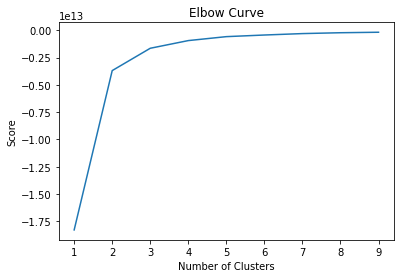

In [60]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [61]:
# Optimal clusters based on the chart is 4 where the line evens out.

# Q5

In [62]:
kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [63]:
kmeans.fit(df)

/Users/julianwere/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [64]:
df['clusters'] = kmeans.fit_predict(df)

/Users/julianwere/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


# Q6

In [67]:
df.head()

,No of arrests,Pop by ethnicity and gender,"Rate per 1,000 of pop by ethnicity",Prop of arrests of this ethnicity,clusters
6,1880.0,138702,13.55,0.022,2
7,15928.0,141148,112.85,0.032,2
10,1200.0,249556,4.81,0.014,1
12,936.0,147258,6.36,0.011,2
13,5088.0,139717,36.42,0.010,2


In [68]:
df['clusters'].value_counts()

0    12648
3     1236
2      288
1      288
Name: clusters, dtype: int64

# Q7

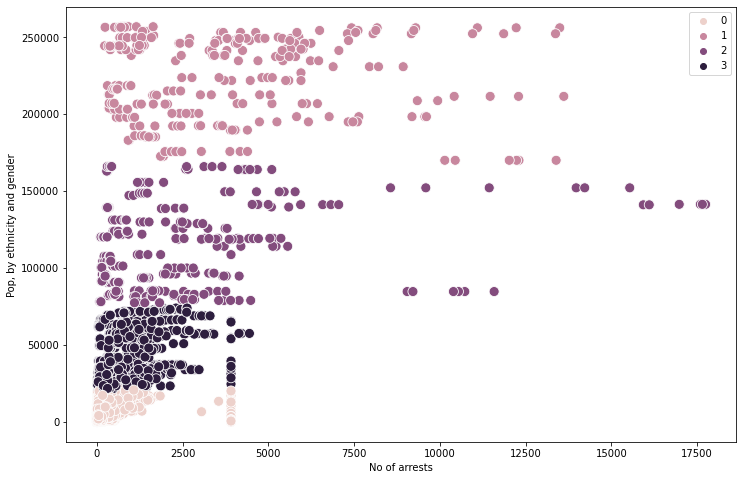

In [76]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['No of arrests'], y=df['Pop by ethnicity and gender'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('No of arrests')
plt.ylabel('Pop, by ethnicity and gender') 
plt.show()

# Q8 First visualisation - The clusters indicate some relationship between the 'Number of Arrests' and 'Pop by Ethnicity and gender' , but it's not conclusive. I would like to dig deeper to explore specific ethnicty, and population counts for Georgrahic regions, as this can lead to further analysis. 

In [ ]:
# Second Variable Test

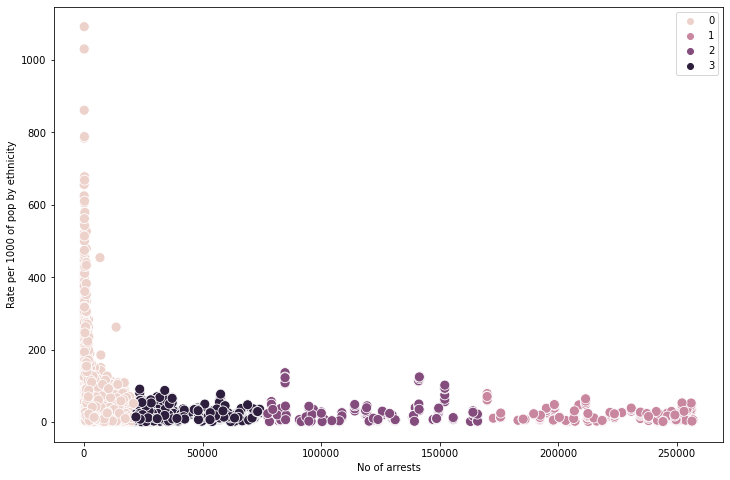

In [81]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Pop by ethnicity and gender'], y=df['Rate per 1,000 of pop by ethnicity'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('No of arrests')
plt.ylabel('Rate per 1000 of pop by ethnicity') 
plt.show()

# The arrest rate above is the number of people arrested from a particular ethnic group out of every 1000 of people from the same group. The clusters indicate a disparity in arrest rates between particular ethnic groups which I want to explore further.

# Q9

In [74]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'
df.loc[df['clusters'] == 3, 'cluster'] = 'navy'

In [85]:
df.groupby('cluster').agg({'No of arrests':['mean', 'median'], 
                         'Rate per 1,000 of pop by ethnicity':['mean', 'median'], 
                         'Pop by ethnicity and gender':['mean', 'median'],
                          'Prop of arrests of this ethnicity':['mean', 'median']})

No of arrests         Rate per 1,000 of pop by ethnicity          \
                     mean  median                               mean  median   
cluster                                                                        
dark purple   2693.423611  1844.0                          23.293576  18.055   
navy           823.067152   574.5                          20.305000  16.265   
pink           303.532891    47.0                          29.503445  16.775   
purple        3699.232639  2866.0                          16.791806  13.865   

            Pop by ethnicity and gender            \
                                   mean    median   
cluster                                             
dark purple               113226.083333  108238.5   
navy                       37412.398058   32023.5   
pink                        4723.417932    2985.0   
purple                    224302.298611  232798.0   

            Prop of arrests of this ethnicity         
                                         mean median  
cluster                                               
dark purple                          0.055580  0.046  
navy                                 0.046139  0.036  
pink                                 0.015776  0.007  
purple                               0.409424  0.095

# 10 - # The number of arrests for a specific demograhic population, with a focus on ethnicitiy and gender. 

In [5]:
df.to_csv(os.path.join(path, 'arrests-data1.csv'))